# Variational AutoEncoder (VAE)

## Learning Objectives

By the end of this lesson, you will be able to:
* Review stacked autoencoders <br/>
* Outline the basics of probability <br/>

## Stacked Autoencoder

* It is a neural network that produces an efficient and compressed representation of the input in an unsupervised way.
* The idea originated in the 1980s and was later promoted by the seminal paper by Hinton and Salakhutdinov, 2006.

### It consists of two networks:

* Encoder network: Converts the high-dimensional input into the low-dimensional code wherein the input size is larger than the output <br/>
* Decoder network: Recovers the data from the code to larger output layers
* Decoder is symmetric to the encoder in terms of layer structure.
* Number of nodes per layer decreases with each subsequent layer of the encoder and increases with each subsequent layer in the decoder. 



### Stacked Autoencoders are mainly used for image reconstruction


![alt text](https://drive.google.com/uc?id=1mTx3TOovZwlTaWq_FeXaSgbRXlPNwQ5J)

<br>
<br>
<br>


## Denoising Autoencoder
* In this type of autoencoder, the input is partially corrupted by adding noises or masking some values of the input vector in a stochastic manner, $x~∼MD(x~|x).$

* It trains the model to recover the original input (not the corrupt one).

![alt text](https://drive.google.com/uc?id=1yaCKpKqgrOeCJtr7h7pdvybNzzFVrglx)

## Sparse Autoencoder
* Regularizes the autoencoder by using a sparsity constraint such that only a small number of nodes will have non zero values. These nodes are called active nodes.
* Forces the model to have only a small number of hidden units activated at the same time, or in other words, one hidden neuron should be inactivate most of times
* Applies a **sparse** constraint on the hidden unit activation to avoid overfitting 

`Note: Now let's see the examples of the above encoders`



### Let's start with a vannila autoencoder

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

Using TensorFlow backend.
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/sumogroup/anaconda3/lib/python3.7/sit

Create encoder model:

In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

Create decoder model:



In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

W0502 08:45:33.261850 4463003072 deprecation_wrapper.py:119] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0502 08:45:33.285129 4463003072 deprecation_wrapper.py:119] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0502 08:45:33.292382 4463003072 deprecation.py:323] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Prepare our input data. 



In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.



In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

(60000, 784)
(10000, 784)


Train the Autoencoder



In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

W0502 08:45:46.738482 4463003072 deprecation_wrapper.py:119] From /Users/sumogroup/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/step - loss: 0.3586 - val_loss: 0.2704
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.2624 - val_loss: 0.2513
Epoch 3/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2419 - val_loss: 0.2303
Epoch 4/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2225 - val_loss: 0.2127
Epoch 5/50
60000/60000 [==============================] - 2s 33us/step - loss: 0.2074 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 2s 34us/step - loss: 0.1961 - val_loss: 0.1899
Epoch 7/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1871 - val_loss: 0.1817
Epoch 8/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.1797 - val_loss: 0.1749
Epoch 9/50
60000/60000 [==============================] - 2s 35us/step - loss: 0.1734 - val_loss: 0.1692
Epoch

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Display the results

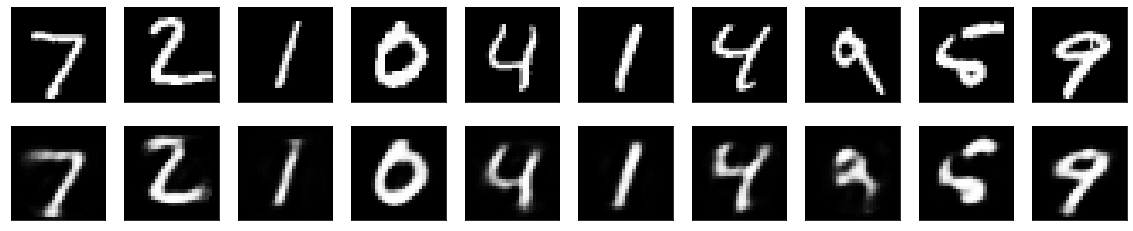

In [9]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Sparse Autoencoder
Now add a sparsity constraint on the encoded representations

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [11]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [12]:
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 37us/step - loss: 0.6721 - val_loss: 0.6484
Epoch 2/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.6284 - val_loss: 0.6090
Epoch 3/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.5916 - val_loss: 0.5749
Epoch 4/100
60000/60000 [==============================] - 2s 40us/step - loss: 0.5598 - val_loss: 0.5454
Epoch 5/100
60000/60000 [==============================] - 2s 32us/step - loss: 0.5323 - val_loss: 0.5198
Epoch 6/100
60000/60000 [==============================] - 2s 33us/step - loss: 0.5084 - val_loss: 0.4975
Epoch 7/100
60000/60000 [==============================] - 2s 34us/step - loss: 0.4875 - val_loss: 0.4780
Epoch 8/100
60000/60000 [==============================] - 2s 35us/step - loss: 0.4692 - val_loss: 0.4609
Epoch 9/100
60000/60000 [==============================] - 2s 38us/step - loss: 0.4531 - val_loss: 0.4

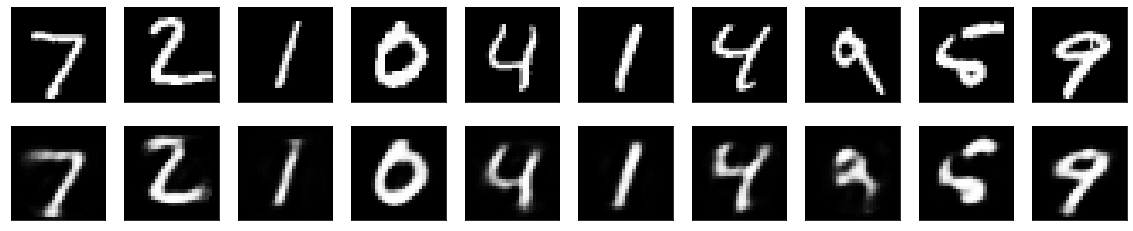

In [13]:
n = 10 # how many images we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

### Denoising Autoencoder

Create and display noisy image

In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

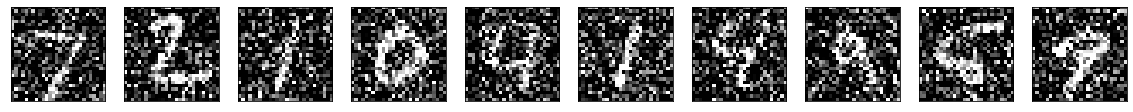

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Configure the autoencoder

In [ ]:
import tensorflow as tf


input_img = tf.keras.layers.Input(shape=(28, 28, 1))

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# the representation is (7, 7, 32)

x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

Train the Autoencoder

In [ ]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=5, # for better result take it as 100
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/5
469/469 [==============================] - 149s 319ms/step - loss: 0.6756 - val_loss: 0.6605
Epoch 2/5
469/469 [==============================] - 149s 317ms/step - loss: 0.6279 - val_loss: 0.5863
Epoch 3/5
469/469 [==============================] - 149s 318ms/step - loss: 0.5435 - val_loss: 0.5196
Epoch 4/5
469/469 [==============================] - 149s 318ms/step - loss: 0.5084 - val_loss: 0.5060
Epoch 5/5
469/469 [==============================] - 151s 323ms/step - loss: 0.4967 - val_loss: 0.4949


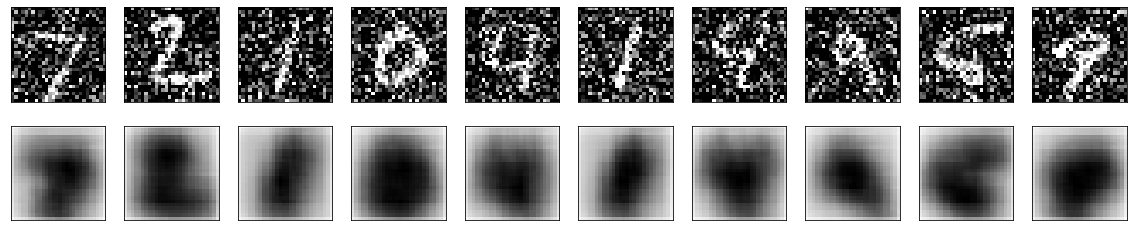

In [22]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## VAE: Variational Autoencoder
* The idea of Variational Autoencoder is less similar to all the autoencoder models above and deeply rooted in the methods of variational Bayesian and graphical models.
* Helps in exploring variations on existing data in a specific way 
* Learns the parameters based on probability distribution of the input data, instead of learning an arbitrary function as in other autoencoders
* Helps in random sampling and interpolation in generative modeling due to continuous nature of latent spaces




![alt text](https://drive.google.com/uc?id=1DVMTh1n44OB8zq5JJ63D-i0kSwaKIxDe)

## Vector Quantized Variational AutoEncoder (VQ-VAE)
* This type of autoencoder model learns a discrete latent variable by the encoder.
* It is a model to map K-dimensional vectors into a finite set of **code** vectors.

### The Architecture of VQ-VAE

![alt text](https://drive.google.com/uc?id=154VfVrhQmBZ2jev06_O0xSnqBJqoca8l)

### Architecture of Hierarchical VQ-VAE and Multistage Image Generation:

![alt text](https://drive.google.com/uc?id=1W20FbRXM-6i2Hk2k4adZ-ytTAncGLL1o)

### The VQ-VAE Algorithm:

![alt text](https://drive.google.com/uc?id=1b7j5pB_rPWQJBHW1eImYFpwEUNhAlEK9)

## Temporal Difference VAE (TD-VAE)
* TD-VAE works with sequential data. 
* It relies on three main ideas:

1) State-Space Models<br/>
2) Belief State<br/>
3) Jumpy Prediction<br/>


### State-Space as Markov Model:

![alt text](https://drive.google.com/uc?id=1uiFCPGwf_F8RaUJLRy4tIlYyxtqZDmoZ)

### A Detailed Overview of TD-VAE Architecture

![alt text](https://drive.google.com/uc?id=1EpCzxC8pCp44XFdn3W2avXE1XZP6MdYJ)

### Assisted Practice:
<b> Problem Statement: </b>
Use Variational Autoencoder with Tensorflow to generate images using the MNIST dataset.
<br>
<br>
<b> Objective: </b>
Generate images of MNIST with Tensorflow


### Assisted Practice:
<b> Problem Statement: </b>
Use Variational Autoencoder with Keras to generate images using the MNIST dataset.
<br>
<br>
<b>Objective:</b> Generate images of MNIST with Tensorflow




## Knowledge Checks
Click [here](https://drive.google.com/file/d/1qT6FCWg5FLSxAPMKekug93owo_O4Twwx/view?usp=sharing) for knowledge checks 

## Lesson End Project
<b> Problem Statement: </b> 
Use Variational Autoencoder with Keras to generate images using the MNIST dataset with PyTorch.
<br>
<br>

<b>Objective:</b>
Generate images of MNIST with Tensorflow


## Key Takeaways
* VAE is deeply rooted in the methods of variational Bayesian and graphical models.
* VAE maps the input to fixed vector instead of a distribution.
* VQ-VAE learns a discrete latent variable by the encoder.

![RL 1](https://drive.google.com/uc?id=17MoU7OAf-PPqV3cisfaCVaw6LYtAcrWm)